## PRACTICAL 5 DRAFT :: Scraping & XML

Tasks:
1. Understanding How Information Is Given In Web Pages
2. Finding How Specific Information In Web Pages Is Encoded
3. Using Python To Automate Information Retrieval From Web Pages
4. A Business Intelligence Scenario

## Task 1 - Understanding How Information Is Given In Web Pages

One of the most common ways of serving information online is through web pages. Web pages are usually given in HTML, a programming language that represents documents as well-structured elements, with sub-elements branching out from containing elements.

As they 'branch' out further and further, they form what is typically called a DOM (Document Object Model) 'tree'.

A DOM tree has a 'head' element, and a 'body' element, with most of the relevant viewing content being stored in the 'body'. An example HTML document illustrating a DOM tree (as given in HTML) can be seen below:

* Note: See how sub-elements branches out from containing element

If you recall from the second practical, this is not the first time we have worked with HTML. In that practical, we used HTML tags to help us style some text. However, in this case, we'll be understanding it a bit further.

To start, open a Chrome web browser window and navigate to the 'Developer Tools' located in the ellipsis bar in the top right of the page:


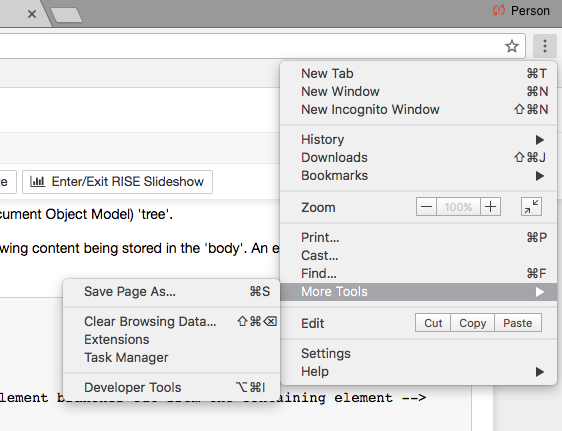

From there, a tabbed sub-window will appear that displays information about the current web page you have opened. It can tell you a lot about the page, although all we are concerned with is the 'Elements' section, that shows the actual HTML DOM tree of the page itself. Notice in the diagram below how the collapsed DOM tree of Google's home page looks similar to our first example in that it has a 'head' and a 'body' tag, as well as 'html' tags encapsulating the document:

![png image](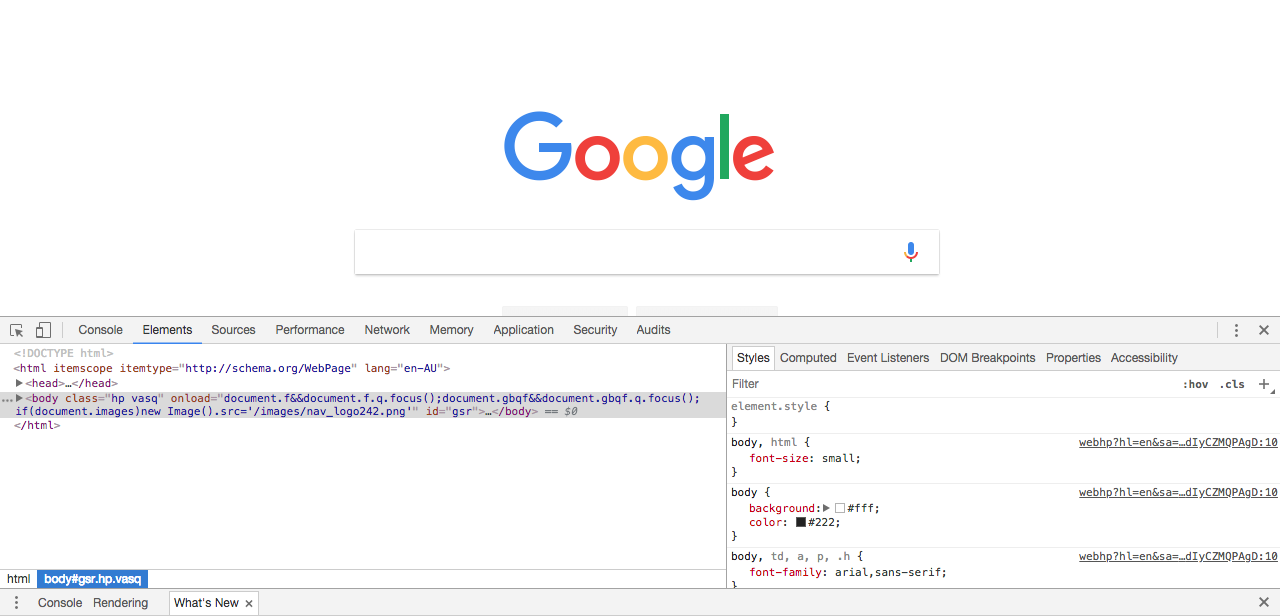
)

We can expand the 'body' tag of the page to view its contained elements by clicking it. If you recall from the second practical, elements commonly have 'classes' written into their tags e.g.

* Here is an element with a class entitled 'a-cool-class':

In the screenshot below, we can see that the class of the contained div element in the body is entitled 'ctr-p':

![png image](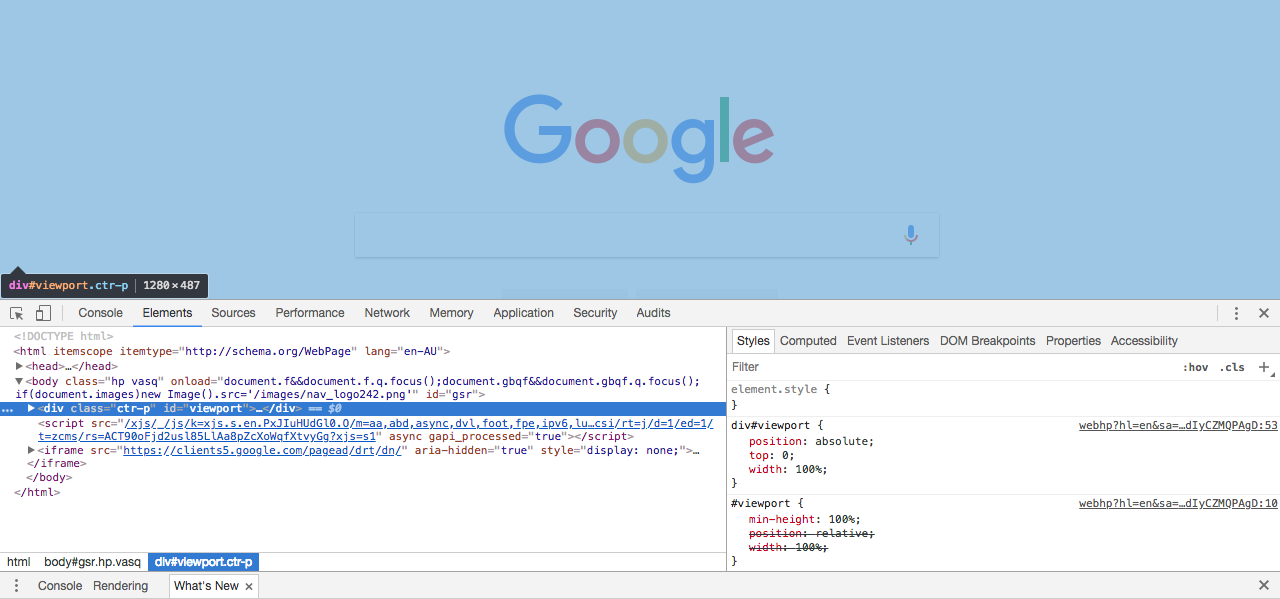
)

From undertaking this first exercise, we can form an understanding of how information is encoded into web pages.

## Task 2 - Finding How Specific Information In Web Pages Is Encoded

Now that we can load up a web page's HTML just from opening it in a browser, let's try something a bit more specific. 

The following web page is the 'Wikipedia' article for Australia:

https://en.wikipedia.org/wiki/Australia

Open a new tab and go to this page. On the page, you'll see in the right sidebar that the capital of Australia is 'Canberra'. If we wanted to know in which element this piece of information has been served to us, we could (as described in the first task), open the 'Developer Tools', and sift through all of the elements until we find it.

But there is a faster way.

Simply right-click the text on the page, and hit the 'Inspect' option. This will load up the 'Developer Tools', which will not only open up the 'Elements' tab of the page, but will jump to the location of the element in which the information is stored:

![png image](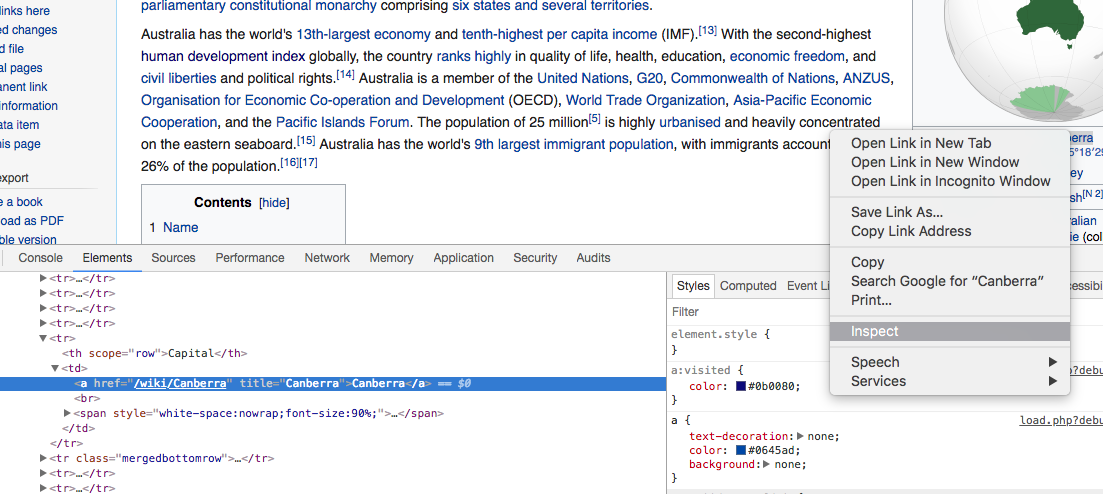
)

Look closely at Canberra's containing element. What is the name of the tag in which it is stored? Although it doesn't have a class, what other attributes does the element have that we can use to describe it?

## Task 3 - Using Python To Automate Information Retrieval From Web Pages

So far, we have been given a clear understanding about how a page renders content in HTML, as well as how to trace information from a web page back to the element it is contained in within the DOM tree.

In this task, we introduce 'BeautifulSoup', a powerful library for Python that enables us to automate information retrieval from a web page:

* Before we can use 'BeautifulSoup', we have to install its parent module onto our Jupyter Notebook. To do so, navigate to your notebook's home page, click the 'New' drop-down menu in the top right, and select 'Terminal'. Then enter the following command:

In [1]:
import sys
!{sys.executable} -m pip install bs4

  Running setup.py bdist_wheel for bs4 ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/84/67/d4/9e09d9d5adede2ee1c7b7e8775ba3fbb04d07c4f946f0e4f11
Successfully built bs4


To validate that you now have the module installed, execute the following 'cell'. Provided that you have installed it correctly, it will load up the 'BeautifulSoup' library without error:

In [2]:
from bs4 import BeautifulSoup

Now that we have the library installed, its time to use it. BeautifulSoup can interpret the DOM tree from a HTML document, so that we can easily pull out elements from the page with simple expressions. Take for instance the following HTML that we load into a variable:

In [3]:
some_HTML_page = \
    '<html>'\
    '   <head>'\
    '   </head>'\
    '   <body>'\
    '      <div>Not Here</div>'\
    '      <div class="target">The Text We Are After</div>'\
    '   </body>'\
    '</html>'

Using BeautifulSoup, we first interpret the page into a variable (in this case entitled 'soup').

From here, there are many possible ways of getting the target element (element with the 'class' of value 'target'). 

The most obvious way for this scenario involves finding the first element with the class of 'target':

In [4]:
soup = BeautifulSoup(some_HTML_page, "lxml")

for element in soup(attrs={'class' : 'target'}):
    print(element)

<div class="target">The Text We Are After</div>


In more complex situations, we might not know the target element's class value, but may know details about its previous element (e.g. the text inside the previous element):

In [5]:
element = soup.find(text="Not Here")
print(element.findNext('div'))

<div class="target">The Text We Are After</div>


If we wanted to run BeatifulSoup on an actual web page, we could simply call the 'requests' library to load down the raw text of that page. Here we specify a basic method for pulling down HTML from a real web page, by specifying its URL:

In [6]:
import urllib.request

def get_HTML(url):
    response = urllib.request.urlopen(url)
    html = response.read()
    return html

Recalling the Wikipedia page for Australia, we can then get its raw HTML using the following code:

In [7]:
Australia_Wiki_HTML = get_HTML('https://en.wikipedia.org/wiki/Australia')

Knowing how to retrieve a HTML element using BeautifulSoup, we need to recall details about the element in which the name of Australia's capital city is stored.

From perusing the elements in the 'Developer Tools' window, we can state the following facts about our target element:

* It has an 'a' tag
* It is inside an element with a 'td' tag
* The element with the 'td' tag is preceded by an element with a 'th' tag
* The element with the 'th' tag contains the text 'Capital'

So the code that would get the exact element we are after is described in the method below:

In [8]:
def get_the_capital(HTML):
    soup = BeautifulSoup(HTML, "lxml")
    th_element = soup.find(text="Capital")
    target_element = th_element.findNext('a')
    print(target_element)

get_the_capital(Australia_Wiki_HTML)

<a href="/wiki/Canberra" title="Canberra">Canberra</a>


Before reading any further, follow this link (https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to learn more about the functions ('find', 'findNext') used in the code above.

To demonstrate just how flexible our solution is, we can run the exact same method on a different country e.g. France:

In [9]:
France_Wiki_HTML = get_HTML('https://en.wikipedia.org/wiki/France')
get_the_capital(France_Wiki_HTML)

<a href="/wiki/Paris" title="Paris">Paris</a>


The reason this solution works so well is because both pages are HTML pages, that possess the same DOM tree structure, which means that on the pages, both countries contain data about their capital cities in the same place.

## Task 4 - A Business Intelligence Scenario

As a market analyst working for a tourism agency, your boss has approached you with a client in need of a recommendation regarding the top tourist destinations of 2018.

While this may sound easy, in hopes that it will improve their tourism experience, the client has also requested that places that are more innovative be prioritised in the recommendation.

Fortunately for this task, the top tourist destinations of 2018 are stored on the following URL:

In [10]:
top_tourism_destinations = 'https://en.wikipedia.org/wiki/World_Tourism_rankings'

Using the Developer Tools, identify things that could be used to describe the table on the page that is in the section entitled "Most visited destinations by international tourist arrivals".

In [11]:
top_tourist_locations = []

Tourism_Wiki_HTML = get_HTML('https://en.wikipedia.org/wiki/World_Tourism_rankings')
soup = BeautifulSoup(Tourism_Wiki_HTML, "lxml")
span_element = soup.find(text="Most visited destinations by international tourist arrivals")
h2_element = span_element.parent
table_element = h2_element.findNext('table')
for td_element in table_element.findAll('td',attrs={'align':'left'}):
    a_element = td_element.find('a')
    if a_element != None:
        top_tourist_locations.append(a_element.text)

top_tourist_locations

['France',
 'United States',
 'Spain',
 'China',
 'Italy',
 'United Kingdom',
 'Germany',
 'Mexico',
 'Thailand',
 'Austria']

Knowing that the client is also looking for places that have higher innovation, what could we use from a single country's Wikipedia page to determine this quality?

The code that retrieves the HDI from a country's Wikipedia page is included in the following method:

In [12]:
def get_country_HDI(html):
    soup = BeautifulSoup(html, "lxml")
    a_element = soup.find('a',text="HDI")
    th_element = a_element.parent
    td_element = th_element.findNext('td')
    HDI_value = td_element.find('img').findNextSibling(text=True)
    return HDI_value.strip()
    
get_country_HDI(France_Wiki_HTML)

'0.897'

Now all we have to do to get the HDI of each country is to substitute each country's name into the Wikipedia country's URL, and to feed the returned HTML into the 'get_country_HDI' method:

In [13]:
for i in range(0, len(top_tourist_locations)):
    print("Country: "+top_tourist_locations[i])
    print("Ranking: "+str(i+1))
    print("HDI: "+get_country_HDI(
        get_HTML('https://en.wikipedia.org/wiki/'+top_tourist_locations[i].replace(' ','%20'))
    ))
    print('\n')

Country: France
Ranking: 1
HDI: 0.897


Country: United States
Ranking: 2
HDI: 0.920


Country: Spain
Ranking: 3
HDI: 0.884


Country: China
Ranking: 4
HDI: 0.738


Country: Italy
Ranking: 5
HDI: 0.887


Country: United Kingdom
Ranking: 6
HDI: 0.909


Country: Germany
Ranking: 7
HDI: 0.926


Country: Mexico
Ranking: 8
HDI: 0.762


Country: Thailand
Ranking: 9
HDI: 0.740


Country: Austria
Ranking: 10
HDI: 0.893




Comparing rankings and HDIs, what would you state in your recommendation: